This is a Python code to train a CNN Algorithem to classify the image is of a dog or a cat

In [16]:
import matplotlib.pyplot as plt
import os
os.chdir("C:\\Users\\Chirag Nayak\\Computer-Vision-with-Python")
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [17]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [18]:
type(cat4)

numpy.ndarray

In [19]:
cat4.shape

(375, 500, 3)

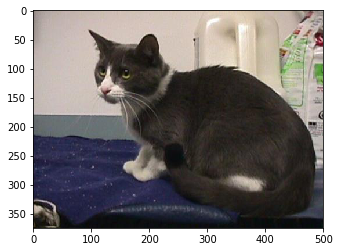

In [20]:
plt.imshow(cat4)

In [22]:
dog2 = cv2.imread('CATS_DOGS/train/DOG/2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [23]:
dog2.shape

(199, 188, 3)

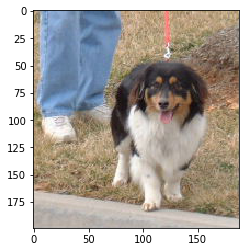

In [24]:
plt.imshow(dog2)

In [25]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [26]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

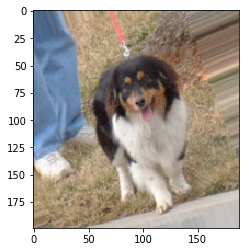

In [27]:
plt.imshow(image_gen.random_transform(dog2))

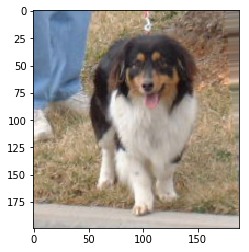

In [28]:
plt.imshow(image_gen.random_transform(dog2))

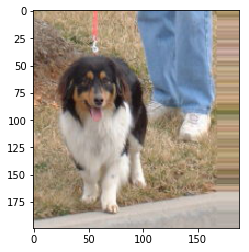

In [29]:
plt.imshow(image_gen.random_transform(dog2))

In [49]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 13386 images belonging to 2 classes.


In [50]:
image_gen.flow_from_directory('CATS_DOGS/test')

Found 11612 images belonging to 2 classes.


### Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [51]:
# width,height,channels
image_shape = (150,150,3)

# Creating the Model

In [52]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [53]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

### Training the Model

In [55]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 13386 images belonging to 2 classes.


In [56]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 11612 images belonging to 2 classes.


In [57]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
results = model.fit_generator(train_image_gen,epochs=3,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/3
150/150 [==============================] - 79s 527ms/step - loss: 0.4066 - acc: 0.8708 - val_loss: 2.0679 - val_acc: 0.0677
Epoch 2/3
150/150 [==============================] - 80s 531ms/step - loss: 0.3890 - acc: 0.8779 - val_loss: 1.5131 - val_acc: 0.0521
Epoch 3/3
150/150 [==============================] - 68s 454ms/step - loss: 0.3445 - acc: 0.8912 - val_loss: 2.6146 - val_acc: 0.0990


In [25]:
# model.save('cat_dog2.h5')

# Evaluating the Model

In [60]:
results.history['acc']

[0.8708333333333333, 0.8779166666666667, 0.8913951546028444]

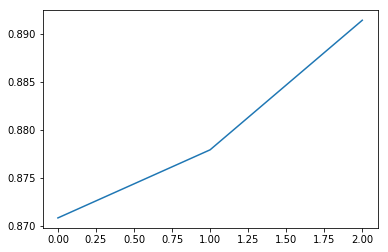

In [61]:
plt.plot(results.history['acc'])

In [28]:
# model.save('cat_dog_100epochs.h5')

# Predicting on new images

In [62]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [66]:
import numpy as np
from keras.preprocessing import image

dog_file = 'CATS_DOGS/test/Dog/48.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [67]:
prediction_prob = model.predict(dog_img)

In [68]:
# Output prediction
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.9433637]] 
